# Batch Normalization
- Enable higher learning rate
- Regularize model
- Improve Accuracy
- Reduce Gradient Vanishing

### Batch normalization
- Normalize output between layers (mean->0, std->1)
- Rescaled by learned parameters

<img src="Figs/6.jpg" alt="Drawing" style="width: 500px;"/>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

display(X[5])
display(y[5])

display(X.shape)
display(y.shape)

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

5

(1797, 64)

(1797,)

5


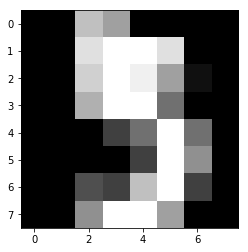

In [3]:
print(y[5])
plt.imshow(X.reshape(-1, 8, 8)[5], cmap='gray')

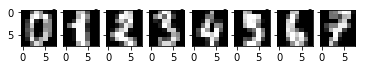

In [4]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')

## Onehot Encoding y

In [5]:
from keras.utils import to_categorical

y_cat = to_categorical(y, 10)

print(y_cat.shape)

Using TensorFlow backend.


(1797, 10)


## Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257, 10)

(540, 64)
(540, 10)


## Model 

In [7]:
def repeated_training(
    X_train, y_train,
    X_test, y_test,
    units=512,
    activation='sigmoid', optimizer='sgd',
    do_bn=False,
    epochs=10, repeats=3):

    from keras.models import Sequential
    from keras.layers import Dense, BatchNormalization
    import keras.backend as K

    histories = []
    
    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        
        # first fully connected layer
        model.add(Dense(units,
                        input_shape=X_train.shape[1:],
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # second fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # third fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # output layer
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train
        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['acc'], h.history['val_acc']])
        print(repeat, end=' ')


    # get stats
    histories = np.array(histories)
    
    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [8]:
# Train without Batch Normalization 
mean_acc, std_acc, mean_acc_val, std_acc_val = repeated_training(
    X_train, y_train,
    X_test, y_test,
    do_bn=False)

0 1 2 


In [9]:
# Train with Batch Normalization
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = repeated_training(
    X_train, y_train,
    X_test, y_test,
    do_bn=True)

0 1 2 


## Evaluate

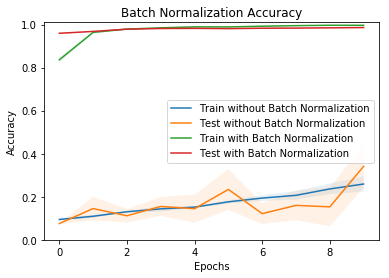

In [11]:
def plot_mean_std(m, s):
    # plot mean
    plt.plot(m)
    
    # Plot std
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)


plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)

plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)

plt.ylim(0, 1.01)
plt.title("Batch Normalization Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train without Batch Normalization', 'Test without Batch Normalization',
            'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')